In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pickle
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from clawpack.visclaw import colormaps, plottools
import pandas as pd

In [3]:
# Path folder Mw
datadir= '/home/jorge/PTHA2/Dataset/mw_91-93/mw_93/'

In [4]:
with open("Database", "rb") as f:
    Data = pickle.load(f)

In [8]:
Data['level1']['zone']['valp']['file']

'level01.nc'

In [17]:
def plot_hfile(rnum, zfill = 5, level = 'level4', zone = 'coq'):
    
    file = Data[level]['zone'][zone]['file']
    rundir = os.path.join(datadir, str(rnum).zfill(zfill))
    fname = os.path.join(rundir, file)
    f = Dataset(fname,'r')
    X = f.variables['lon'][:]
    Y = f.variables['lat'][:]
    
    lat = Data[level]['zone'][zone]['latitude']
    lon = Data[level]['zone'][zone]['longitude']
    
    print(X.shape)
    print(Y.shape)
    B0 = f.variables['deformed_bathy'][:]
    
    B0 = pd.DataFrame(B0.data, index=Y.data, columns=X.data)
    # filtrar por limites latitud
    B0 = B0[(B0.index>= lat[0]) & (B0.index<=lat[1])].T
    # filtrar por limites longitud
    B0 = B0[(B0.index>= lon[0]) & (B0.index<=lon[1])].T
    
    hmax = (f.variables['max_height'][:])
    
    hmax = pd.DataFrame(hmax.data, index=Y.data, columns=X.data)
    # filtrar por limites latitud
    hmax = hmax[(hmax.index>= lat[0]) & (hmax.index<= lat[1])].T
    # filtrar por limites longitud
    hmax = hmax[(hmax.index>= lon[0]) & (hmax.index<= lon[1])].T
    
    X = hmax.columns
    Y = hmax.index

    zmin = 0.
    zmax = 20.

    cmap_land = colormaps.make_colormap({ 0.0:[0.1,0.4,0.0],
                                         0.25:[0.0,1.0,0.0],
                                          0.5:[0.8,1.0,0.5],
                                          1.0:[0.8,0.5,0.2]})

    cmap_water = colormaps.make_colormap({ 0.0:[0,0,1], 1.:[.8,.8,1]})

    cmap_topo, norm_topo = colormaps.add_colormaps((cmap_land, cmap_water),
                                         data_limits=(zmin,zmax),
                                         data_break=0.)

    # Color map for hmax:

    clines = [0,.5,1.0] + list(linspace(2.0,16.0,8))
    nlines = len(clines)
    n1 = int(floor((nlines-1)/2.))
    n2 = nlines - 1 - n1
    Green = hstack([linspace(1,1,n1),linspace(1,0,n2)])
    Red = hstack([linspace(0,0.8,n1), ones(n2)])
    Blue = hstack([linspace(1,0.2,n1), zeros(n2)])
    hmax_colors = list(zip(Red,Green,Blue))
    
    figure(figsize=(12,6))
    contour(X,Y,B0,[-30,0,10,30,50], colors='k')
    #hmax_onshore = where(B0<0, hmax, nan)
    #hmax_onshore = hmax
    cf = contourf(X,Y,hmax,clines,colors=hmax_colors)
    cbar = colorbar(label='meters')
    cbar.set_ticks(clines)
    title('Inundation depth for run %s' % str(rnum).zfill(5));

(2136,)
(2816,)


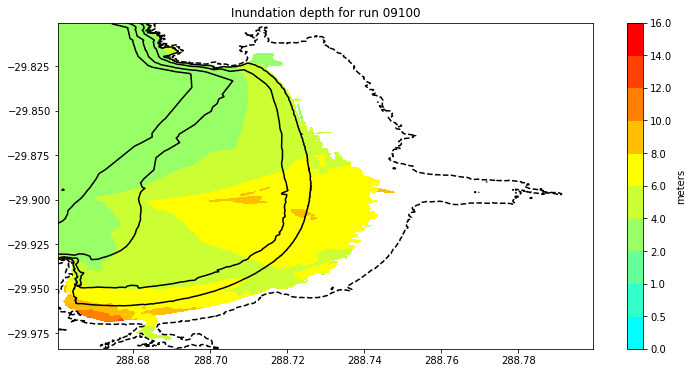

In [18]:
# 
plot_hfile(9100)